In [295]:
import os

import pandas as pd

from __future__ import print_function, division

%matplotlib inline

import nsfg
import numpy as np
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt

In [296]:
pd.set_option('display.max_columns', None)
fname = os.path.join("",
                     "WA_Fn-UseC_-HR-Employee-Attrition.csv")

employee_attr = pd.read_csv(fname)

employee_attr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Checking the data types

In [297]:
#Describing each field in the dataset
employee_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Age
- Min: 18
- Max: 60
- Mean ~37

I am considering taking out the records for employees that are 18-years-old. In most situations, companies don't hire people this young unless it is for internships or possibly co-op work. I would think that these employees are more likely to leave a company anyway because they have to go back to school or they find another learning opportunity, etc. There are 8 employees that are of age 18 out of 1,470 so it would not affect the statistics to either leave them in or take them out though. 

Also, I think most people start their careers after graduating college around age 22-23, so I think I will subset the sample to remove those ages to focus on the employees that are working full-time at the company and have their undergraduate degrees at least. I want the dataset to be more representative of the typical career path. 

Daily Rate pertains to the salary level of an employee .. I don't think this field will give us as much information as hourly rate or monthly rate, so I am going to remove it. 

Standard hours is the same value for every employee. 80 hours itself is a lot of time to work for the average employee, so these employees could all possibly be overworked and that could play into attrition as well :) but given that they all work the same amount, the column is not very useful. I am also taking out Employee Count for the same reason.

There are many "years" variables: total working years, training times last year, years at company, years in current role, years since last promotion, and years with current manager. I honestly think they are all helpful to our question of what are the dominant factors for why employees choose to leave a company? They all represent different things for the employee and could play key roles in the analysis of the question.

For Education Field, I think it is very common these days that people don't necessarily work in the field that they majored in. With that, I am going to drop this column as it doesn't seem extremely relevant to the problem of attrition.

Over 18 and OverTime binary variables (Yes/No)
- Since I am considering removing the employees of age 18, this variable would not be useful (Over18).
- OverTime -- everyone has to work overtime eventually and since there's not numerical variables showing how many hours of overtime or count of instances of overtime, it really doesn't describe much. 

I am assuming that the employees represented in this dataset are full-time employees, which means that the rate variables would not be as significant as understanding their yearly incomes or salaries. Therefore, I am going to drop the 'rate' columns. 

In [298]:
#Removing unnecessary columns
#employee_attr = employee_attr.drop(['EducationField','Over18','OverTime'], 1)
#employee_attr = employee_attr.drop('MonthlyRate',1)
#employee_attr = employee_attr.drop(['EmployeeCount','StandardHours'],1)
#employee_attr = employee_attr.drop('DailyRate',1)
employee_attr = employee_attr.drop(['HourlyRate','MonthlyRate','EducationField','Over18','OverTime','EmployeeCount','StandardHours','DailyRate'],1)
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,14,3,4,0,17,3,2,9,6,0,8


In [299]:
employee_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [300]:
#Adding new column for yearly salary to dataset
employee_attr['YearlyIncome'] = employee_attr['MonthlyIncome'] *12
employee_attr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2,41616


In [301]:
# Rows containing duplicate data -- none!
duplicate_rows_df = employee_attr[employee_attr.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Finding the null values -- also none!
print("\nNull values")
print(employee_attr.isnull().sum())

number of duplicate rows:  (0, 28)

Null values
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
YearlyIncome                0
dtype: int64


### Histograms

#### Histogram of Age

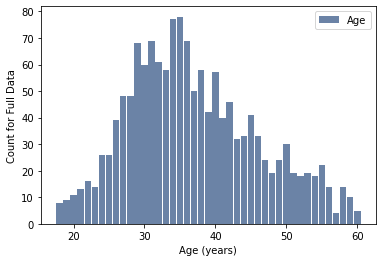

In [302]:
hist = thinkstats2.Hist(employee_attr.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Full Data')

The distribution of age for the entire dataset is relatively left-skewed. From looking at the histogram, it looks like there are outliers from age 18- ~21. Those ages are quite young for employees at a company, as usually companies hire people with undergraduate degrees and most people graduate from college at age 22 or 23. I am going to remove this population from the dataset to more align with the dataset with normal working ages at a company.

In [303]:
employee_attr = employee_attr[employee_attr.Age > 22]

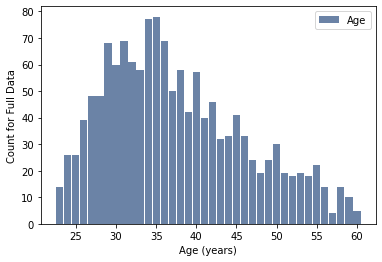

In [304]:
hist = thinkstats2.Hist(employee_attr.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Full Data')

#### Histogram of Yearly Income and Monthly Income

In [305]:
#No missing values in the new column
employee_attr.YearlyIncome.isnull().sum()

0

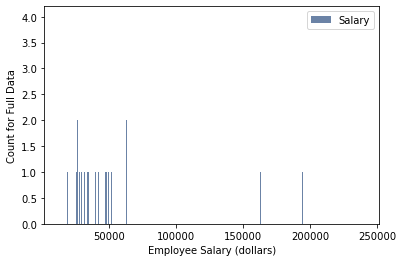

In [306]:
hist = thinkstats2.Hist(employee_attr.YearlyIncome, label='Salary')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Employee Salary (dollars)', ylabel='Count for Full Data')

In [307]:
#Analyzing outliers from yearly income analysis
reg_income = employee_attr[employee_attr.YearlyIncome < 100000]
reg_income.shape

(1043, 28)

In [308]:
high_income = employee_attr[employee_attr.YearlyIncome > 100000]
high_income

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
8,38,No,Travel_Frequently,Research & Development,23,3,12,4,Male,2,3,Manufacturing Director,3,Single,9526,0,21,4,2,0,10,2,3,9,7,1,8,114312
15,29,No,Travel_Rarely,Research & Development,21,4,20,2,Female,4,3,Manufacturing Director,1,Divorced,9980,1,11,3,3,1,10,1,3,10,9,8,8,119760
18,53,No,Travel_Rarely,Sales,2,4,23,1,Female,2,4,Manager,4,Married,15427,2,16,3,3,0,31,3,3,25,8,3,7,185124
22,34,No,Travel_Rarely,Research & Development,7,4,28,1,Female,3,3,Research Director,2,Single,11994,0,11,3,3,0,13,4,3,12,6,2,11,143928
25,53,No,Travel_Rarely,Research & Development,5,3,32,3,Female,3,5,Manager,3,Divorced,19094,4,11,3,4,1,26,3,2,14,13,4,8,229128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,35,No,Travel_Rarely,Human Resources,26,4,2040,3,Female,3,3,Human Resources,4,Single,8837,1,16,3,3,0,9,2,3,9,0,1,7,106044
1461,50,Yes,Travel_Rarely,Sales,28,3,2055,4,Male,2,3,Sales Executive,1,Divorced,10854,4,13,3,2,1,20,3,3,3,2,2,0,130248
1462,39,No,Travel_Rarely,Sales,24,1,2056,2,Female,2,4,Sales Executive,4,Married,12031,0,11,3,1,1,21,2,2,20,9,9,6,144372
1463,31,No,Non-Travel,Research & Development,5,3,2057,2,Male,3,2,Manufacturing Director,1,Single,9936,0,19,3,2,0,10,2,3,9,4,1,7,119232


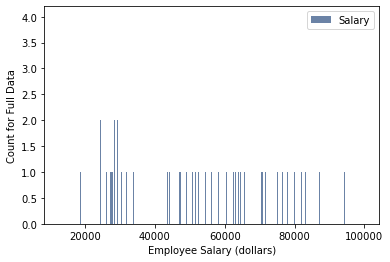

In [309]:
hist = thinkstats2.Hist(reg_income.YearlyIncome, label='Salary')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Employee Salary (dollars)', ylabel='Count for Full Data')

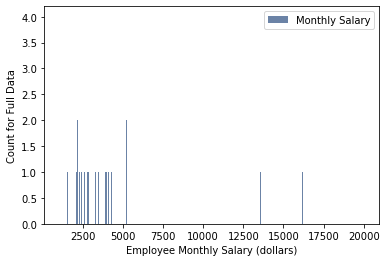

In [310]:
hist = thinkstats2.Hist(employee_attr.MonthlyIncome, label='Monthly Salary')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Employee Monthly Salary (dollars)', ylabel='Count for Full Data')

From the distributions of monthly income and yearly income, it is appararent that there are outlier values for salaries above 100,000 dollars. Depending on your job level and field, this salary range of above $100,000 can be attainable, but I think even with the outliers, salary plays a key role in determining if employees stay at a company. Therefore, I will not remove this subset. 

The distributions for monthly income and yearly income for the entire dataset are the same, which makes sense as yearly income is calculated from the monthly incomes. 

#### Histogram of distance from home

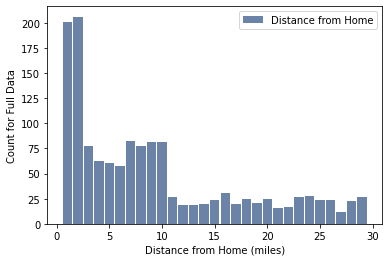

In [311]:
hist = thinkstats2.Hist(employee_attr.DistanceFromHome, label='Distance from Home')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Distance from Home (miles)', ylabel='Count for Full Data')

- Left-skewed distribution
- The IBM office for most employees is relatively close to their homes, less than ~3 miles

#### Histogram of NumCompanies Worked and PercentSalaryHike

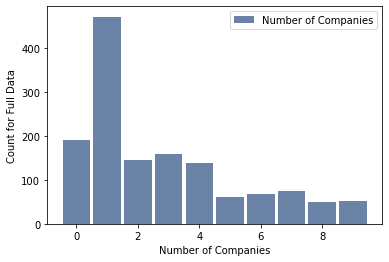

In [312]:
hist = thinkstats2.Hist(employee_attr.NumCompaniesWorked, label='Number of Companies')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Companies', ylabel='Count for Full Data')

In [313]:
#Removing employees with zero companies worked at -- doesn't make any sense when they are working at IBM
employee_attr = employee_attr[employee_attr.NumCompaniesWorked > 0]
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,17,3,3,1,17,3,3,5,2,0,3,30852
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,15,3,1,1,9,5,3,7,7,1,7,119892
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,20,4,2,1,6,0,3,6,2,0,3,73704
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,14,3,4,0,17,3,2,9,6,0,8,64680


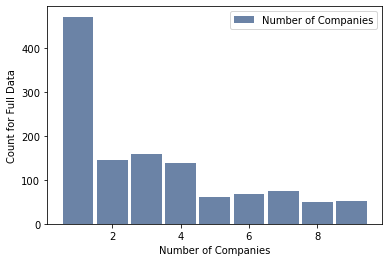

In [314]:
hist = thinkstats2.Hist(employee_attr.NumCompaniesWorked, label='Number of Companies')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Companies', ylabel='Count for Full Data')

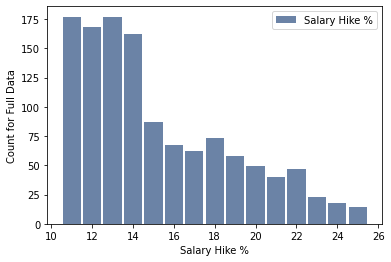

In [315]:
hist = thinkstats2.Hist(employee_attr.PercentSalaryHike, label='Salary Hike %')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Salary Hike %', ylabel='Count for Full Data')

Percentage increase in salary
- I don't think this variable is very useful as the percentage increase in salary usually depends on multiple factors such as the company's overall yearly performance, an employee's performance reviews, etc.
- In terms of determining why an employee would leave a company, I think yearly income is more of a telling sign than percentage increase. Therefore, I am going to remove this variable.

In [316]:
employee_attr = employee_attr.drop('PercentSalaryHike',1)
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,3,3,1,17,3,3,5,2,0,3,30852
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,3,1,1,9,5,3,7,7,1,7,119892
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,4,2,1,6,0,3,6,2,0,3,73704
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,3,4,0,17,3,2,9,6,0,8,64680


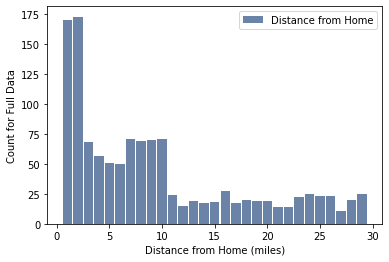

In [317]:
hist = thinkstats2.Hist(employee_attr.DistanceFromHome, label='Distance from Home')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Distance from Home (miles)', ylabel='Count for Full Data')

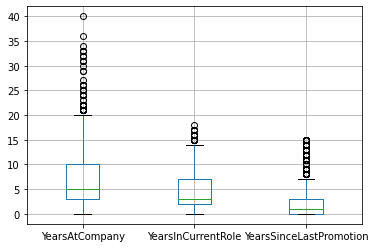

In [318]:
#Boxplots to check for outliers
boxplot = employee_attr.boxplot(column=['YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion'])

#Distributions are not completely normal -- slight skew to the right (higher end of scale with longer tails)

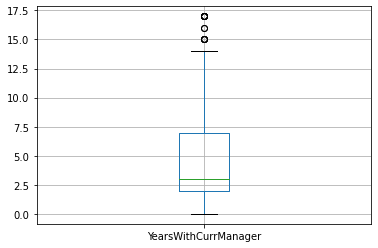

In [319]:
boxplot = employee_attr.boxplot(column=['YearsWithCurrManager'])

When looking at the years variables, it is tough to say that any entries are outliers, since employees often do and are even supposed to have varying years of experience at a company and within their career. At my company, there are employees with 35+ years, while I have less than a year, so I wouldn't say any of these outliers above the top of the boxplots are out of the ordinary or need to be removed. 

Categorical Data Analysis

<AxesSubplot:>

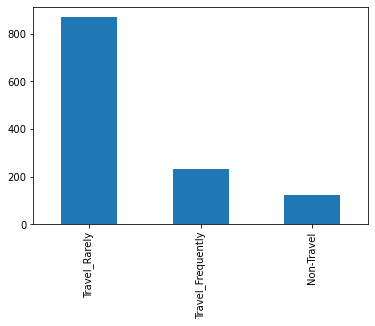

In [320]:
employee_attr['BusinessTravel'].value_counts().plot(kind='bar')

<AxesSubplot:>

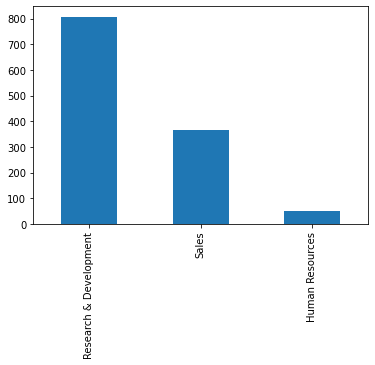

In [321]:
employee_attr['Department'].value_counts().plot(kind='bar')

[Text(0, 0, 'College'),
 Text(1, 0, 'Below College'),
 Text(2, 0, 'Master'),
 Text(3, 0, 'Bachelor'),
 Text(4, 0, 'Doctor')]

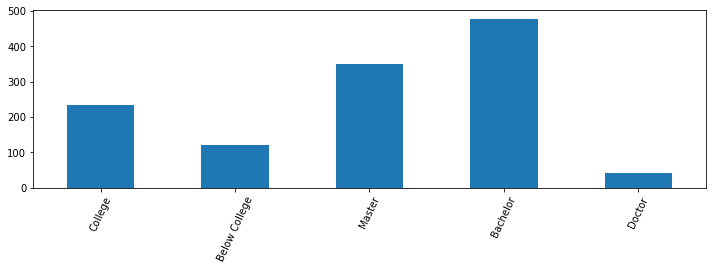

In [322]:
x = employee_attr['Education'].unique()
y = employee_attr['Education'].value_counts()
s = pd.Series(y, index=x)

#indexes
idx = np.asarray([i for i in range(len(x))])
#names
education = ['College','Below College','Master','Bachelor','Doctor']

ax = s.plot(kind='bar', figsize=(10, 3))
ax.figure.tight_layout()
ax.set_xticks(idx)
ax.set_xticklabels(education, rotation=65)

In [323]:
#Looking at data with Doctorate degree -- see what field they contribute to
doctor = employee_attr[employee_attr.Education == 5]
doctor

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
52,44,No,Travel_Rarely,Sales,1,5,68,2,Female,3,2,Sales Executive,1,Divorced,5454,5,4,3,1,9,2,2,4,3,1,3,65448
56,35,No,Travel_Frequently,Sales,18,5,74,2,Male,3,3,Sales Executive,1,Married,9069,1,4,4,1,9,3,2,9,8,1,8,108828
61,38,No,Travel_Frequently,Research & Development,29,5,79,4,Female,3,2,Laboratory Technician,4,Single,2406,1,3,4,0,10,2,3,10,3,9,9,28872
142,38,No,Travel_Rarely,Research & Development,3,5,193,4,Female,3,2,Research Scientist,3,Single,4317,3,4,2,0,19,2,3,3,2,2,2,51804
151,35,No,Travel_Rarely,Sales,1,5,204,3,Male,3,3,Sales Executive,2,Married,7295,1,3,1,2,10,3,3,10,8,0,6,87540
169,32,No,Travel_Rarely,Research & Development,6,5,231,3,Male,3,1,Research Scientist,3,Single,3038,3,4,1,0,8,2,3,5,4,1,4,36456
208,40,No,Non-Travel,Research & Development,9,5,287,4,Male,2,2,Healthcare Representative,4,Married,4876,9,3,4,1,5,5,1,3,2,0,2,58512
329,47,No,Travel_Rarely,Research & Development,5,5,447,4,Male,3,5,Research Director,3,Married,18300,4,3,2,1,21,2,3,3,2,1,1,219600
348,42,No,Travel_Rarely,Research & Development,23,5,468,1,Female,3,4,Research Director,4,Single,15992,2,3,2,0,16,2,3,1,0,0,0,191904
358,36,No,Non-Travel,Sales,1,5,479,4,Female,3,2,Sales Executive,4,Single,6653,4,3,2,0,7,6,3,1,0,0,0,79836


In [324]:
print(doctor.shape)
#48 rows

(42, 27)


The sample of employees with education "Below College" would be interesting to explore as you usually don't expect these people to have as many years at a company or if any job/career at all, but this is definitely a bias that I have learned from my education as well.

Separating the Employee Attrition dataset into two subsets: one for employees that have left the company (Yes) and one for employees that are still with the company (No)

In [325]:
attrition_yes = employee_attr[employee_attr.Attrition == "Yes"]
attrition_yes.shape
#237 rows, 35 columns

(190, 27)

In [326]:
attrition_no = employee_attr[employee_attr.Attrition == "No"]
attrition_no.shape
#1233 rows, 35 columns

(1032, 27)

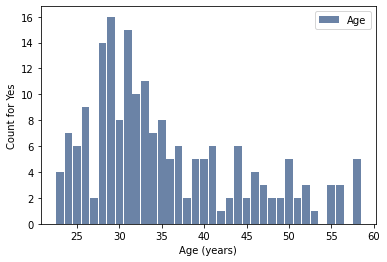

In [327]:
hist = thinkstats2.Hist(attrition_yes.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Yes')

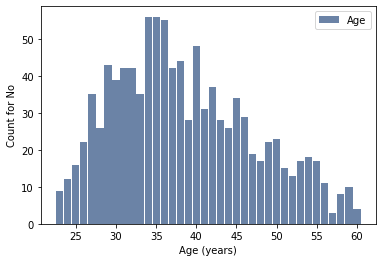

In [328]:
hist = thinkstats2.Hist(attrition_no.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for No')

The distribution of age for both datasets is relatively left-skewed; more employees are at the younger end of the age scale around 25-35 years old. There are few employees past the age of 45 years or so. Therefore, in both groups, we can see some overlap in age distributions, which could potentially show that age does not play as impactful of a factor in whethere there is employee attrition at a company.